## W poniższym okienku proszę wpisać swoje **imię, nazwisko i numer grupy**.

*   Imię: Wojciech
*   Nazwisko: Siemiątkowski
*   Grupa: 12c


# **Kwaterniony**

Parę $q = [s, \bf{v}]$, gdzie $s \in {\mathbb R}$, natomiast $\bf{v} \in {\mathbb R}^3$ nazywamy **kwaternionem**. 

Równoważnie można zapisać kwaternion jako sumę:
$ q = a \cdot {\it e} + b \cdot{\it i} + c \cdot{\it j} + d \cdot{\it k}$, gdzie i, j oraz k spełniają $i^2 = j^2 = k^2 = -1$, natomiast $e$ jest tzw. elementem neutralnym, tzn. $e^2 = 1$.

### **Definicje**:

> #### 1. Iloczyn kwaternionów

$q_1 * q_2= [s_1s_2 - {\bf v}_1\cdot {\bf v}_2, \quad s_1 {\bf v}_2 + s_2 {\bf v}_1 + {\bf v}_1 \times {\bf v}_2]$,

 gdzie $\cdot$ to iloczyn skalarny, a $\times$ oznacza iloczyn wektorowy.

> #### 2. Norma kwaternionów

Norma kwaternionu $q$ jest dana wzorem $|q| = \sqrt{q*q^*}$, gdzie sprzężenie $q^*$ definiuje się podobnie jak w przypadku liczb zespolonych: $[s, {\bf v}]^* = [s, -{\bf v}]$.

> ##### 3. Obroty

Niech $q = [s, {\bf u}]$ będzie kwaternionem o normie jeden. Wówczas ${\bf qvq}^*$ obraca wektor ${\bf v}$ wokół osi danej przez ${\bf u}$.





# **Zadania teoretyczne**

Rozwiązania poniższych zadań należy wpisać jako kod, lub wkleić zdjęcie, lub zapisać w latexu.

### **Zadanie 1**

Pokaż, że $i^2 = -1$.

$i = [0, [1, 0, 0]]$

$i * i = [0 - 1, [0, 0, 0] + [0, 0, 0] + [0, 0, 0]]$

$ i^2 = [-1, [0, 0, 0]]$

$i^2 = - 1$

### **Zadanie 2**

Pokaż, że dla $q = [a, [b,c,d]]$ zachodzi $|q|^2 = a^2 + b^2 + c^2 + d^2$.

$q * q^* = [a, [b, c, d] * [a, [-b, -c, -d]]$

$|q|^2 = [a^2 + b^2 + c^2 + d^2, [-ab, -ac, -ad] + [ab, ac, ad] + [0, 0, 0]]$

$|q|^2 = [a^2 + b^2 + c^2 + d^2, [0, 0, 0]]$

$|q|^2 = a^2 + b^2 + c^2 + d^2$

### **Zadanie 3**

Niech $q = \left[\cos \frac{\theta}{2}, [0,0,\sin \frac{\theta}{2}]\right]$. Pokaż, że |q| = 1, oraz że $q {\bf v} q^*$ obraca wektor $v = [1,0,0]$ o $-90^o$ wokół osi $z$, gdy $\theta = 90^o$.

$|q| = q * q^* = [cos^2(a/2) + 0 + 0 + sin^2(a/2), [0, 0, 0]] = cos^2a + sin^2a = 1$

$v = [0, [1, 0, 0]]$

$b = \sqrt{2}/2 $

$a = 90^°, q = [b, [0, 0, b]]$


$v * q^* = [0, [1, 0, 0]] * [b, [0, 0, -b]]$

$v * q^* = [0, [0, 0, 0] + [b, 0, 0] + [0, b, 0]] = [0, [b, b, 0]]$ 

$[b, [0, 0, b]]*[0, [b, b, 0]] = [0, [b^2, b^2, 0] + [0, 0, 0] + [-b^2, b^2, 0] = [0, [b^2, b^2, 0] + [0, 0, 0] + [-b^2, b^2, 0]$

$[0, [0, 2b^2, 0]] = [0, 1]$




---



---



## **Zadania programistyczne**

## **Zadanie 1**

Przy pomocy biblioteki [pyquaternion](http://kieranwynn.github.io/pyquaternion/) sprawdź wynik **Zadania 3**



In [5]:
import numpy
numpy.set_printoptions(suppress=False)

q = Quaternion(scalar=numpy.cos(numpy.pi/4), vector=(0.0, 0.0, numpy.sin(numpy.pi/4)))
norma = q*q.conjugate
print(f"|q| : {numpy.abs(norma)}")

v = numpy.array([1., 0., 0.])
v_rotated = q.rotate(v);

v_quaternion = Quaternion(scalar=0.0, vector=(1.0, 0.0, 0.0))
vq1 = v_quaternion*q.conjugate
vq2 = vq1 * q

print(f"qvq*: {vq2}")
print(f"Faktyczny obrót wektora v: {v_rotated}")

|q| : 1.0
qvq*: +0.000 +1.000i +0.000j +0.000k
Faktyczny obrót wektora v: [2.22044605e-16 1.00000000e+00 0.00000000e+00]


## **Zadanie 2**

Przy pomocy biblioteki [pyquaternion](http://kieranwynn.github.io/pyquaternion/) obróć wektor $[1,0,0]$ najpierw o $90^o$ wokół osi $z$, następnie o $90^o$ wokół osi $x$, a na koniec o o $90^o$ wokół osi $y$. Sprawdź czy operacja ta powtórzona $10^6$ razy spowoduje pojawienie się błędów numerycznych.

In [2]:
!pip install pyquaternion
from pyquaternion import Quaternion

In [6]:
x_quaternion = Quaternion(axis=[1, 0, 0], angle=numpy.pi/2)
y_quaternion = Quaternion(axis=[0, 1, 0], angle=numpy.pi/2)
z_quaternion = Quaternion(axis=[0, 0, 1], angle=numpy.pi/2)

v = numpy.array([1., 0., 0.])
v_rotated = z_quaternion.rotate(v)
v_rotated = x_quaternion.rotate(v_rotated)
v_rotated = y_quaternion.rotate(v_rotated)

print(v_rotated)

for i in range(1, 10**6):
  v_rotated = z_quaternion.rotate(v_rotated)
  v_rotated = x_quaternion.rotate(v_rotated)
  v_rotated = y_quaternion.rotate(v_rotated)

print(v_rotated)
print("Dla jednej tury jak i dla 10^6 otrzymujemy taki sam wynik")

[1.00000000e+00 2.22044605e-16 0.00000000e+00]
[1. 0. 0.]
Dla jednej tury jak i dla 10^6 otrzymujemy taki sam wynik


### **Zadanie 3**

W odróżnieniu od macierzy obrotu kwaterniony dają możliwość łatwego wyliczania pośrednich kroków obrotu. Obróć wektor $[1,0,0]$ wokół osi $[1,1,0]$ o kąt $\pi$. Korzystając z  Quaternion.intermediates wylicz 1000 pośrednich kroków tego obrotu i narysuj je w przestrzenii trójwymiarowej.

In [ ]:
import numpy
import matplotlib.pyplot as plt

v = numpy.array([1., 0., 0.])
q0 = Quaternion(axis=[1, 1, 0] , angle=0.0) 
q1 = Quaternion(axis=[1, 1, 0] , angle=numpy.pi) 
num = 1000
all = numpy.zeros((num+2,3))
i = 0
for q in Quaternion.intermediates(q0, q1, num, include_endpoints=True):
    v_prime = q.rotate(v)
    all[i,:]= v_prime[:]
    i += 1

Text(0.5, 0, 'z')

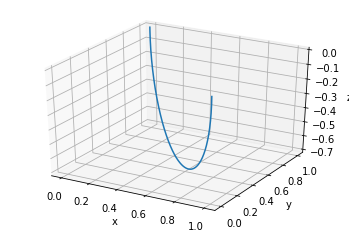

In [ ]:
fig = plt.figure(0)
ax = fig.gca(projection="3d")
ax.plot(all[:, 0], all[:, 1], all[:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')